In [1]:
import scipy.io as sio
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
d_file = 'SC46.mat'
h_file = 'SC67.mat'
disease = sio.loadmat(d_file)['data_d_selected']
healthy = sio.loadmat(h_file)['data_h_selected']


In [3]:
## Kmeans
kmeans = KMeans(n_clusters=2, random_state=0)
d_idx = kmeans.fit_predict(disease)
h_idx = kmeans.predict(healthy)
print('Kmeans: ', sum(h_idx == 0)/len(h_idx))

Kmeans:  0.9441894429376173


In [4]:
## Birch
birch = Birch(n_clusters=2)
d_idx_b = birch.fit_predict(disease)
h_idx_b = birch.predict(healthy)
print('Birch: ', sum(h_idx_b == 1)/len(h_idx_b))

Birch:  0.8694971833924473


In [5]:
## MiniBatchKMeans
mbkmeans = MiniBatchKMeans(n_clusters=2, random_state=1, batch_size=4096)
d_idx_mbk = mbkmeans.fit_predict(disease)
h_idx_mbk = mbkmeans.predict(healthy)
print(' Mini Batch KMeans: ', sum(h_idx_mbk == 0)/len(h_idx_mbk))

 Mini Batch KMeans:  0.9491967452534947


In [6]:
d_onpaper = sio.loadmat('SC46_onpaper.mat')['data_selected']
d_o_idxmbk = mbkmeans.predict(d_onpaper)
print('---------------------')
print('mini-batch KMeans:', d_o_idxmbk)

---------------------
mini-batch KMeans: [0 0 1 0 0 0 0 0 0 0 0 0 0]


In [21]:
## mean shift
ms = MeanShift()
d_idx_ms = ms.fit_predict(disease)
h_idx_ms = ms.predict(healthy)
print(h_idx_ms)
print(' Mean Shift: ', sum(h_idx_ms == 0)/len(h_idx_ms))

[0 0 0 ... 0 0 0]
 Mean Shift:  1.0


In [23]:
## Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
d_idx_ac = ac.fit_predict(disease)

In [56]:
from sklearn.mixture import GaussianMixture
from numpy import unique
gm = GaussianMixture(n_components=2, random_state=2)
d_idx_gm = gm.fit_predict(disease)
h_idx_gm = gm.fit_predict(healthy)
print(unique(h_idx_gm))
clusters = unique(h_idx_gm)
for cluster in clusters:
    print('Gaussian Mixture cluster: ',cluster, sum(h_idx_gm == cluster)/len(h_idx_gm))
# print('Gaussian Mixture: ', sum(h_idx_gm == 0)/len(h_idx_gm))

[0 1]
Gaussian Mixture cluster:  0 0.6243480075109534
Gaussian Mixture cluster:  1 0.3756519924890465


In [11]:
X_embedded = TSNE(n_components=2, learning_rate=1e5, init='random',verbose=True, random_state = 100).fit_transform(disease)
# tsne = TSNE(n_components=2, random_state=20, verbose=1, perplexity=50, learning_rate=1e4, early_exaggeration=40, n_iter=4000)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18415 samples in 0.030s...
[t-SNE] Computed neighbors for 18415 samples in 0.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18415
[t-SNE] Computed conditional probabilities for sample 2000 / 18415
[t-SNE] Computed conditional probabilities for sample 3000 / 18415
[t-SNE] Computed conditional probabilities for sample 4000 / 18415
[t-SNE] Computed conditional probabilities for sample 5000 / 18415
[t-SNE] Computed conditional probabilities for sample 6000 / 18415
[t-SNE] Computed conditional probabilities for sample 7000 / 18415
[t-SNE] Computed conditional probabilities for sample 8000 / 18415
[t-SNE] Computed conditional probabilities for sample 9000 / 18415
[t-SNE] Computed conditional probabilities for sample 10000 / 18415
[t-SNE] Computed conditional probabilities for sample 11000 / 18415
[t-SNE] Computed conditional probabilities for sample 12000 / 18415
[t-SNE] Computed conditional probabilities for sam

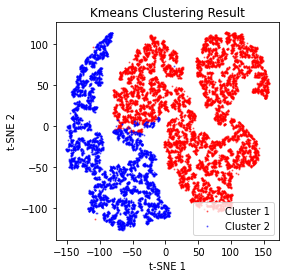

In [12]:
plt.figure(figsize=(4,4))
plt.scatter(X_embedded[d_idx == 0, 0], X_embedded[d_idx == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx == 1, 0], X_embedded[d_idx == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Kmeans Clustering Result')
plt.legend()
plt.show()

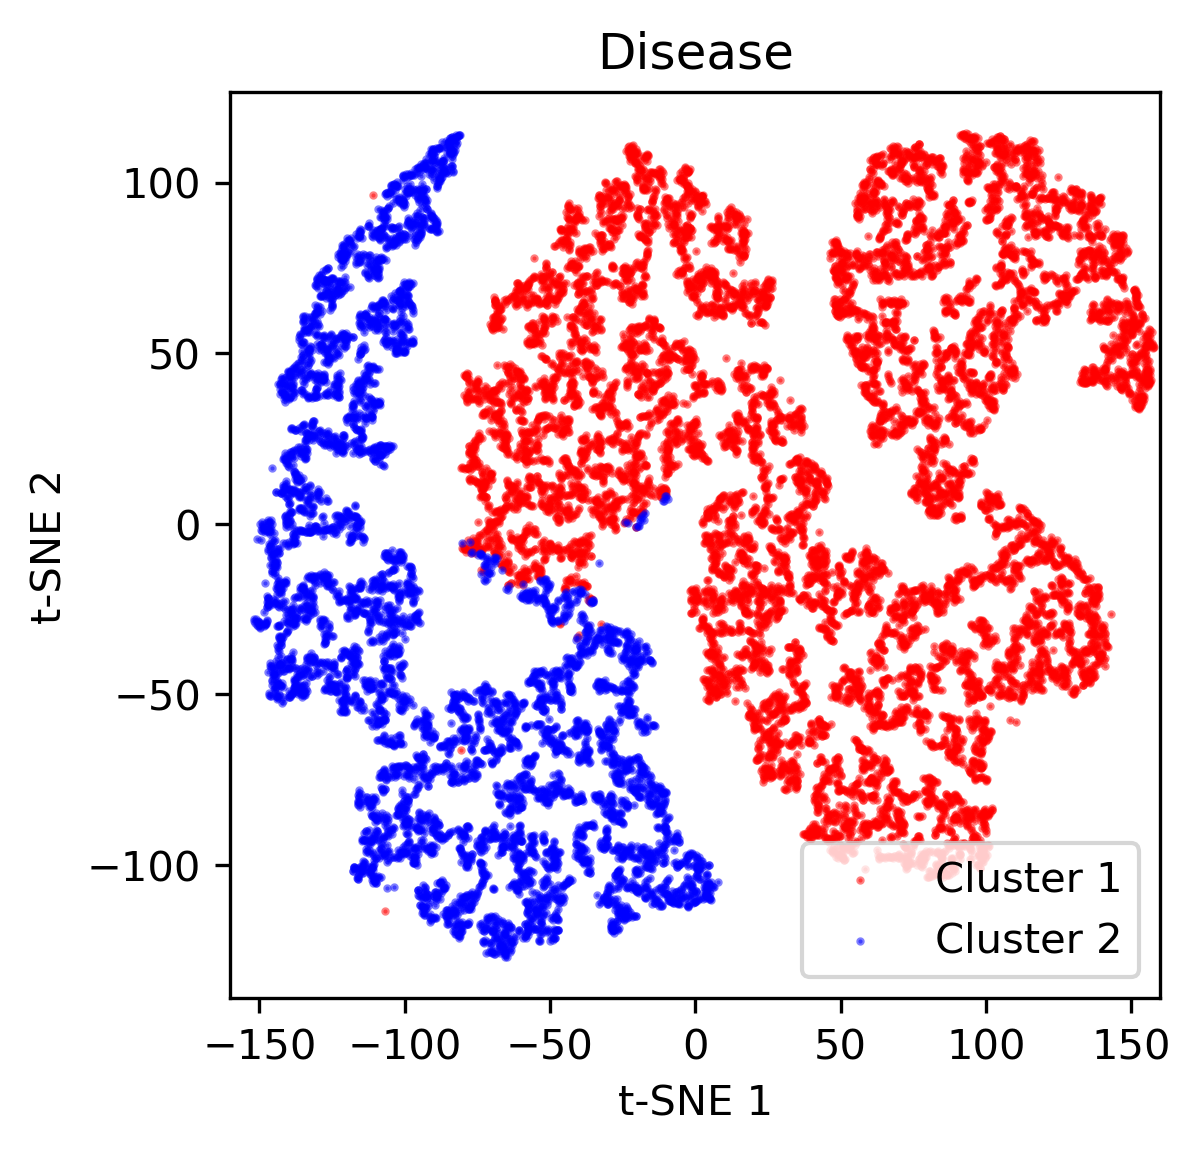

In [28]:
my_dpi = 300
plt.figure(figsize=(4, 4), dpi=my_dpi)
plt.scatter(X_embedded[d_idx_mbk == 0, 0], X_embedded[d_idx_mbk == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_mbk == 1, 0], X_embedded[d_idx_mbk == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Disease')
plt.legend()
plt.xlim([-160, 160])
plt.savefig('disease.png', dpi=my_dpi * 10)
plt.show()


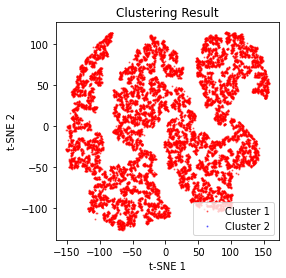

In [38]:
plt.figure(figsize=(4,4))
plt.scatter(X_embedded[d_idx_ms == 0, 0], X_embedded[d_idx_ms == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_ms == 1, 0], X_embedded[d_idx_ms == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clustering Result')
plt.legend()
plt.show()

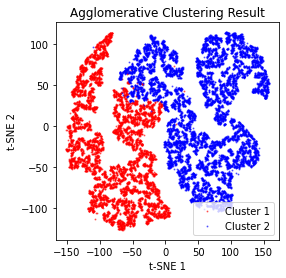

In [63]:
plt.figure(figsize=(4,4))
plt.scatter(X_embedded[d_idx_ac == 0, 0], X_embedded[d_idx_ac == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_ac == 1, 0], X_embedded[d_idx_ac == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Agglomerative Clustering Result')
plt.legend()
plt.show()

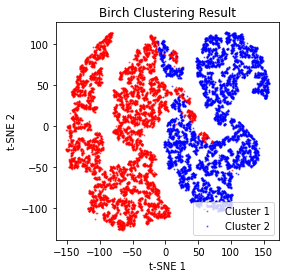

In [45]:
plt.figure(figsize=(4,4))
plt.scatter(X_embedded[d_idx_b == 0, 0], X_embedded[d_idx_b == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_b == 1, 0], X_embedded[d_idx_b == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Birch Clustering Result')
plt.legend()
plt.xlim([-160, 160])
plt.show()

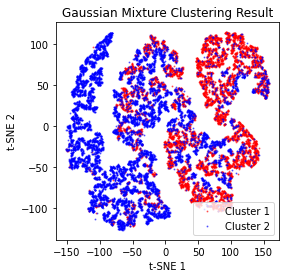

In [57]:
plt.figure(figsize=(4,4))
plt.scatter(X_embedded[d_idx_gm == 0, 0], X_embedded[d_idx_gm == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_gm == 1, 0], X_embedded[d_idx_gm == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Gaussian Mixture Clustering Result')
plt.legend()
plt.show()

In [61]:
print('Disease Patient: ', sum(d_idx == 0)/len(d_idx))

Disease Patient:  0.6396959000814554


In [73]:
import numpy as np
fname01 = "tsne_output_20211210.csv"
np.savetxt(fname01, X_embedded, delimiter=",")
fname02 = "kmeans_index_disease_20211210.csv"
np.savetxt(fname02, d_idx)
fname03 = "kmeans_index_healthy_20211210.csv"
np.savetxt(fname03, h_idx)
fname04 = "minibatchkmeans_index_disease_20211210.csv"
np.savetxt(fname04, d_idx_mbk)
fname05 = "minibatchkmeans_index_healthy_20211210.csv"
np.savetxt(fname05, h_idx_mbk)
fname06 = "birch_index_disease_20211210.csv"
np.savetxt(fname06, d_idx_b)
fname07 = "birch_index_healthy_20211210.csv"
np.savetxt(fname07, h_idx_b)
fname08 = "agglomerativeclustering_index_disease_20211210.csv"
np.savetxt(fname08, d_idx_ac)

In [20]:
X_healthy = TSNE(n_components=2, learning_rate=1e4, init='random',verbose=True, random_state = 100).fit_transform(healthy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9586 samples in 0.016s...
[t-SNE] Computed neighbors for 9586 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9586
[t-SNE] Computed conditional probabilities for sample 2000 / 9586
[t-SNE] Computed conditional probabilities for sample 3000 / 9586
[t-SNE] Computed conditional probabilities for sample 4000 / 9586
[t-SNE] Computed conditional probabilities for sample 5000 / 9586
[t-SNE] Computed conditional probabilities for sample 6000 / 9586
[t-SNE] Computed conditional probabilities for sample 7000 / 9586
[t-SNE] Computed conditional probabilities for sample 8000 / 9586
[t-SNE] Computed conditional probabilities for sample 9000 / 9586
[t-SNE] Computed conditional probabilities for sample 9586 / 9586
[t-SNE] Mean sigma: 103.335357
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.110107
[t-SNE] KL divergence after 1000 iterations: 1.021257


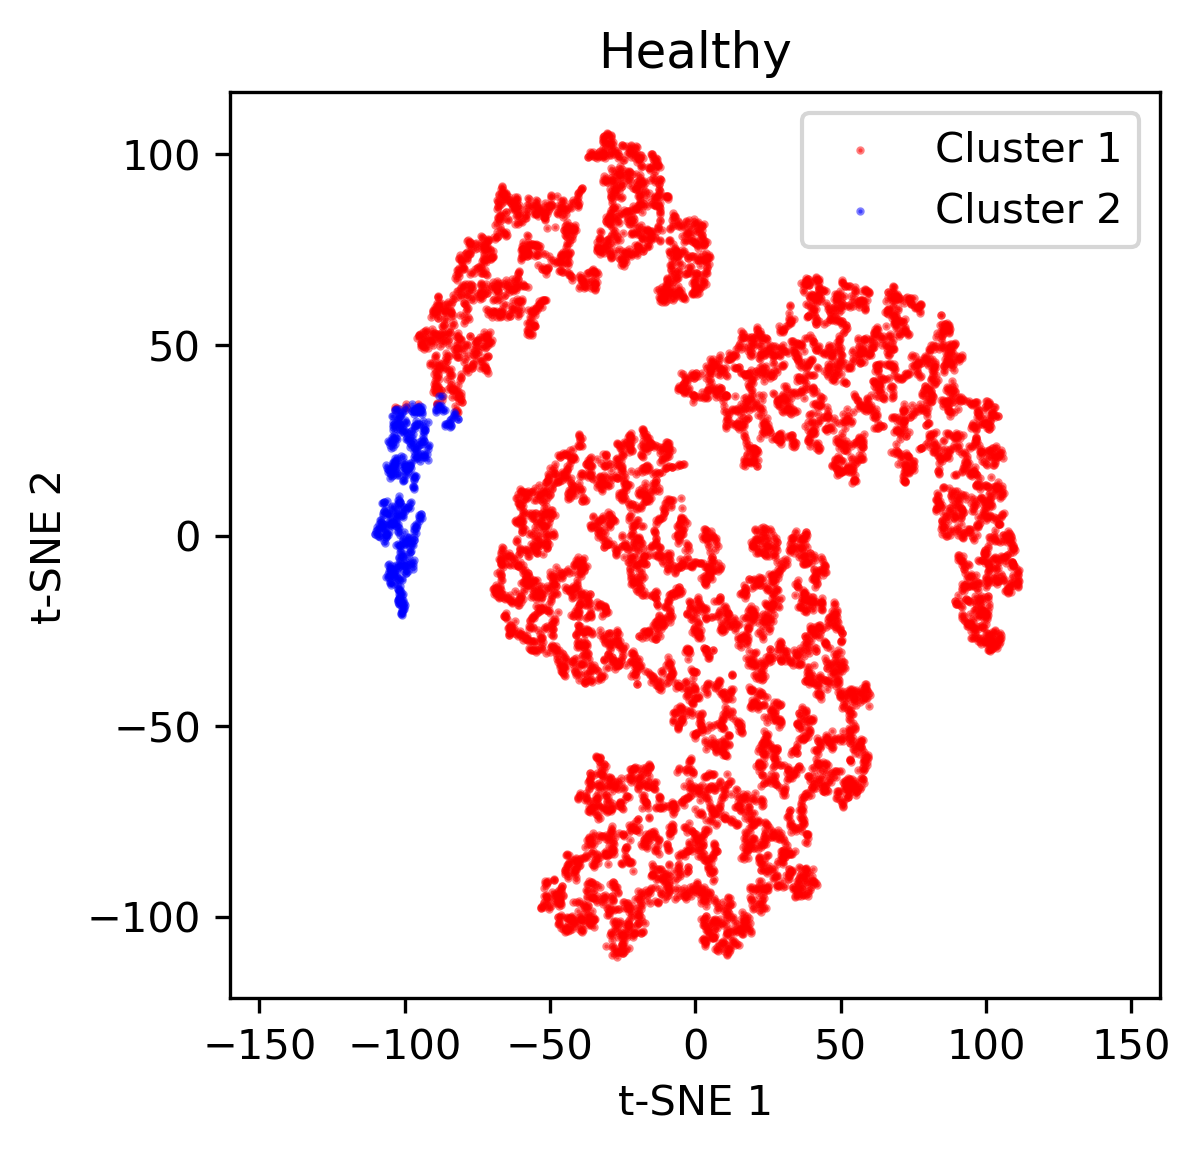

In [27]:
my_dpi = 300
plt.figure(figsize=(4, 4), dpi=my_dpi)
plt.scatter(X_healthy[h_idx_mbk == 0, 0], X_healthy[h_idx_mbk == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_healthy[h_idx_mbk == 1, 0], X_healthy[h_idx_mbk == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Healthy')
plt.legend()
plt.xlim([-160, 160])
plt.savefig('healthy.png', dpi=my_dpi * 10)
plt.show()